 ## Preparing our Dataset

The dataset I am using is the "Forest Cover Type Dataset" which is part of the UCI Machine Learning Repository I found on Kaggle. Here is some information from the Kaggle page:

Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

Here is the link: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

I will import the data and look at the column names to decide features and labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import os
# Set your Kaggle API credentials here if needed:
# os.environ['KAGGLE_USERNAME'] = 'your_username'
# os.environ['KAGGLE_KEY'] = 'your_api_key'



In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lskug\.cache\kagglehub\datasets\uciml\forest-cover-type-dataset\versions\1


In [5]:
df = pd.read_csv("C:/Users/lskug/.cache/kagglehub/datasets/uciml/forest-cover-type-dataset/versions/1/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
list(df.columns)

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

## Creating our model

After looking at the dataset, ive concluded the label is the 'Cover Type' and the features are every other column. I will use pandas to make two df's accordingly. I then will use the sklearn train_test_split to train our model using our features and label matrices. I decided to use a randomforestclassifier since we have tabular data here.

In [7]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #let's do 80/20

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Analyzing our results

Lets use our model on our datasets and make some conclusions. I want to use the accuracy score function for sklearn and I want to also plot the most important feautres using a bar graph.

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
print(classification_report(y_test, y_pred))


accuracy: 0.9551646687262807
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



This is very encouraging. Our precision, recall and f1 scores are all 90%+. We can also a see an encouraging sign of higher scores with more samples, as we see thre highest performer having the highest support and the lowest performer having the lowest. I think with a more balanced dataset we would see greater results.

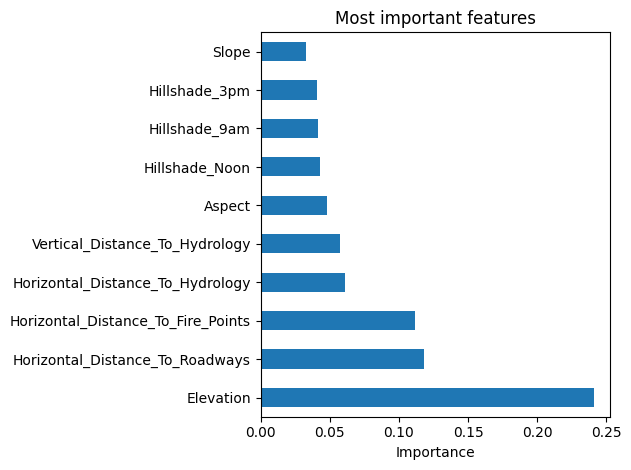

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(10) #Take the largest features, the rest are not very significant.
top_features.plot(kind='barh')
plt.title("Most important features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


As we can see from above the single most important feature is the elevation. This contributes to about 25% of the models decision making. Other important predictors are the distance to roadways and fire points. Slope and hillshades seem to be minor, so we can concluude that forest cover type is mostly by elevation and proximity to human infastructure. In the future I could hypertune parameters and test other classifiers.